# **ANÁLISIS DE VENTAS Y TENDENCIAS EN LA INDUSTRIA DE LOS VIDEOJUEGOS**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

*Laura Marcela Vásquez López*  

*Christian Bermúdez Rivas*

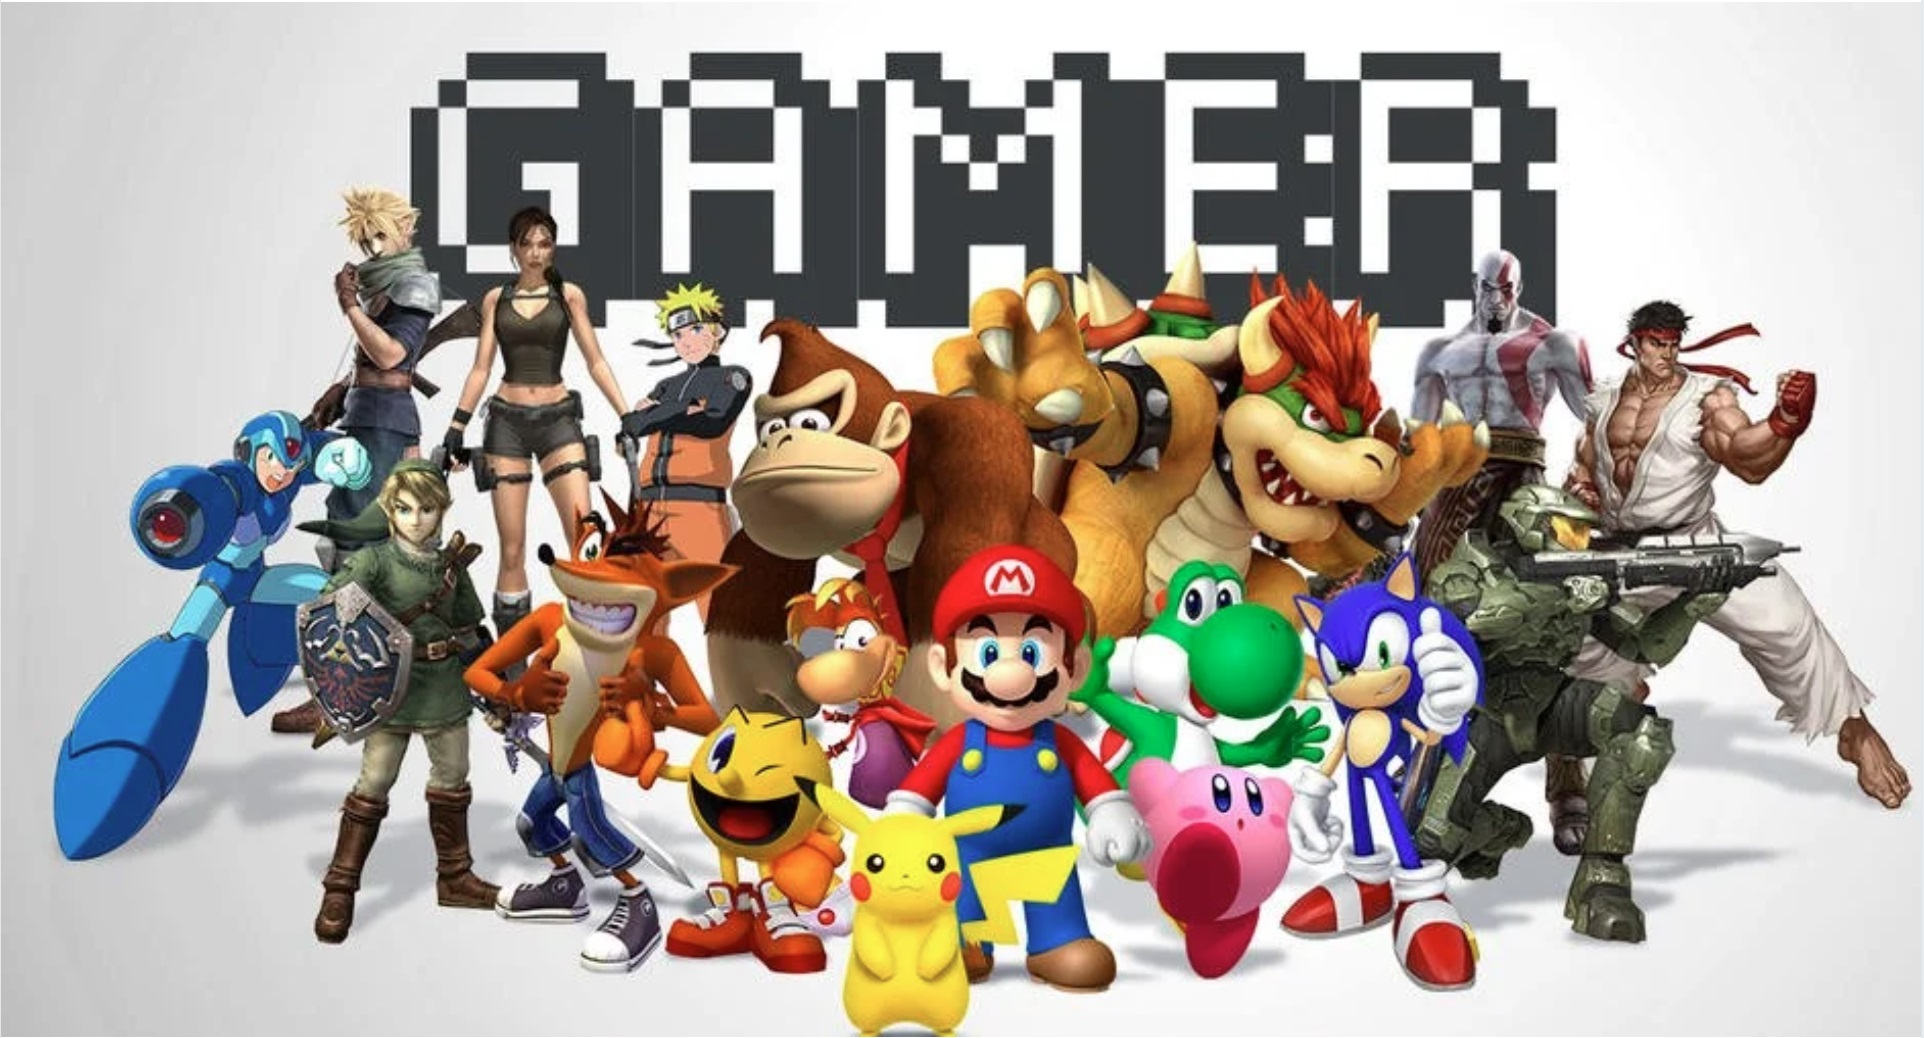

In [2]:
from IPython.display import display, Image

# Cargar y mostrar la imagen
display(Image(filename='videojuegos.jpg', width=700, height=400))


## **CONTEXTO DEL NEGOCIO**

La industria de los videojuegos ha experimentado un crecimiento exponencial
desde su inicio en la década de 1970. Con la evolución de la tecnología, las consolas, los géneros y la distribución digital han transformado la manera en que los jugadores interactúan con los videojuegos. Desde los arcade hasta los juegos en la nube, la industria ha demostrado su capacidad de adaptación y expansión, convirtiéndose en un sector multimillonario que rivaliza con otras formas de entretenimiento como el cine y la música. El análisis de las ventas y tendencias dentro de esta industria permite comprender los factores importantes que impulsan su desarrollo y cómo los jugadores han influenciado su evolución.


## **PREGUNTAS DEL NEGOCIO**

A pesar del crecimiento sostenido de la industria, no todas las plataformas ni géneros han tenido el mismo desempeño. Comprender qué consolas han dominado el mercado, cuáles son los videojuegos más vendidos y cuál es el impacto del top 10 en las ventas totales, puede proporcionar información valiosa para desarrolladores, inversionistas y analistas de mercado. Además, evaluar las tendencias de ventas en regiones clave como Japón, Estados Unidos y Europa, así como el comportamiento de géneros específicos, puede ayudar a prever cambios en la industria. Para resolver lo anterior es necesario responder a las siguientes preguntas:

* ¿Cual es el top 10 de videojuegos basado en el total de ventas?
* ¿Cuánto fué la suma aportada por estos 10 juegos, versus el resto de los juegos?
* Porcentualmente hablando ¿cuánto es el aporte del top 10 de juegos elegido versus el resto de los juegos?
* ¿Cómo se encuentran porcentualmente divididas el total de ventas?
* ¿Cuál es la tendencia de las ventas en Japón, Estados Unidos y Europa?
* ¿Cuál es la tendencia para los géneros de Action, Role-Playing, Strategy and Misc?
* ¿Cómo es la distribución porcentual de las ventas para los años 2000, 2005, 2010 y 2015?
* ¿Qué género aportó más porcentualmente en cada año y por cuánto valor?
* Compare 3 géneros en un rango de 4 años entre el 2000 al 2010 e indique ¿dónde presentó cada género mayor auge o ventas?
* ¿Cómo es la distribución percentil? ¿dónde presenta mayor agrupamiento de los datos?
* En una vista superpuesta indique o compare los scores para el género escogido. ¿Hay cercanía entre las valoraciones de los usuarios y la de los críticos?
* ¿Cuál es el valor del score aproximadamente donde un videojuego alcanzó el mayor número de ventas?
* ¿Cuál es la distribución de la correlación para el género escogido?
* ¿Qué relación existe entre los scores de los jugadores y de la crítica para el género escogido?
* ¿Qué plataforma obtuvo la mayor cantidad de ventas?
* ¿Cuántos juegos por año se lanzaron por plataforma?
* ¿Cuál es el juego más valorado por la crítica? ¿Cuál por los usuarios?
* ¿Cuántos juegos tiene cada productor o publicador de videojuegos?

## **CONJUNTO DE DATOS**

El conjunto de datos utilizado en este análisis contiene información detallada sobre las ventas de videojuegos a lo largo del tiempo, incluyendo datos de distintas consolas, géneros, ventas regionales y puntuaciones de crítica y usuarios. Este dataset permite explorar las ventas globales y regionales, así como analizar la relación entre la popularidad de un videojuego y su recepción por parte de la comunidad. A través de este estudio, se busca proporcionar una visión integral de las tendencias de la industria, facilitando la identificación de patrones y la toma de decisiones basada en datos.

## **SOLUCIONES BASADAS EN VISUALIZACIÓN**

Para responder a las dudas relacionadas con el negocio, se llevarán a cabo las siguientes visualizaciones.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datos = pd.read_excel('games_sales_data_PBI.xlsx', sheet_name='games_sales_data_PBI')
datos.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Ejercicio 1

* ¿Cual es el top 10 de videojuegos basado en el total de ventas?
* ¿Cuánto fué la suma aportada por estos 10 juegos, versus el resto de los juegos?
* Porcentualmente hablando ¿cuánto es el aporte del top 10 de juegos elegido versus el resto de los juegos?

In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

# Cargar y limpiar los datos
df = datos.dropna(subset=['Year_of_Release']).copy()
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

# Filtrar columnas necesarias
df1 = df[['Name', 'Year_of_Release', 'Global_Sales']].copy()

# Obtener años únicos ordenados
years = sorted(df1["Year_of_Release"].unique())

# Crear la aplicación Dash
app = Dash(__name__)

# **DISEÑO DE LA INTERFAZ**
app.layout = html.Div([
    html.H1("Análisis de Ventas de Videojuegos", style={'textAlign': 'center'}),

    # **Contenedor para selector de año + cuadros de texto**
    html.Div([
        # Selector de año
        html.Div([
            html.Label("Seleccionar Año:", style={'fontSize': '18px', 'fontWeight': 'bold'}),
            dcc.Dropdown(
                id='year-selector',
                options=[{'label': str(year), 'value': year} for year in years],
                value=years[0],  
                clearable=False,
                style={
                    'width': '150px',  
                    'fontSize': '16px', 
                    'padding': '5px'
                }
            ),
        ], style={'margin-right': '30px'}),  # Espacio entre el selector y los cuadros de texto

        # Cuadros de texto alineados a la derecha
        html.Div([
            html.Label("Ventas Top 10 (Millones USD):", style={'fontSize': '16px', 'fontWeight': 'bold'}),
            html.Div(id='ventas-top10', style={'fontSize': '20px', 'fontWeight': 'bold', 'margin-bottom': '10px'}),

            html.Label("Ventas Resto de Juegos (Millones USD):", style={'fontSize': '16px', 'fontWeight': 'bold'}),
            html.Div(id='ventas-resto', style={'fontSize': '20px', 'fontWeight': 'bold'})
        ])
        
    ], style={'display': 'flex', 'alignItems': 'center', 'margin-bottom': '20px'}),  # Alinear en fila

    # **Gráficos**
    dcc.Graph(id='bar-chart'),
    dcc.Graph(id='pie-chart')
])

# **CALLBACK PARA ACTUALIZAR LOS GRÁFICOS Y CUADROS DE TEXTO**
@app.callback(
    [Output('bar-chart', 'figure'),
     Output('pie-chart', 'figure'),
     Output('ventas-top10', 'children'),
     Output('ventas-resto', 'children')],
    [Input('year-selector', 'value')]
)
def actualizar_graficos(año):
    df_filtrado = df1[df1["Year_of_Release"] == año].copy()

    # Obtener el Top 10 juegos más vendidos, asegurando orden descendente
    top_10 = df_filtrado.nlargest(10, "Global_Sales").sort_values(by="Global_Sales", ascending=True)

    # Sumar ventas del Top 10 y del resto de juegos
    total_top10 = round(top_10["Global_Sales"].sum(), 2)
    total_resto = round(df_filtrado["Global_Sales"].sum() - total_top10, 2)

    # **GRÁFICO DE BARRAS**
    fig_bar = px.bar(
        top_10,
        x="Global_Sales",
        y="Name",
        orientation='h',
        title=f"Top 10 Juegos Más Vendidos en {año}",
        color="Global_Sales",
        color_continuous_scale="Spectral"
    )

    fig_bar.update_traces(marker=dict(line=dict(color="black", width=1)))

    # **GRÁFICO DE PIE CHART**
    fig_pie = px.pie(
        names=["Top 10", "Resto de Juegos"],
        values=[total_top10, total_resto],
        title=f"Distribución de Ventas en {año}",
        color=["Top 10", "Resto de Juegos"],
        color_discrete_sequence=["#1f77b4", "#ff7f0e"]
    )

    return fig_bar, fig_pie, f"{total_top10} M USD", f"{total_resto} M USD"


# **INICIAR LA APLICACIÓN**
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)



Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


SystemExit: 1

/home/chrisbermudezr/Documentos/unidad_08/env/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3557: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



A partir de las visualizaciones anteriores, se puede inferir el comportamiento de las ventas de los videojuegos más exitosos en función del año de interés. Asimismo, el análisis a lo largo del tiempo permite identificar cómo ha evolucionado la industria en términos de la cantidad de títulos lanzados al mercado.

Por ejemplo, en 1980, el Top 10 de videojuegos concentraba el 100% de las ventas, lo que evidencia un mercado aún reducido y dominado por un número limitado de títulos. Sin embargo, con el paso del tiempo, se observa una creciente diversificación en la oferta de videojuegos. Para 1990, el incremento en la variedad de títulos es notable, aunque el Top 10 todavía representaba aproximadamente el 90% de las ventas globales, con Super Mario consolidándose como el videojuego más vendido de ese año.

En contraste, en un año más reciente, como 2020, se observa un fenómeno atípico: un solo videojuego concentró la totalidad de las ventas globales. Este comportamiento puede estar relacionado con la crisis generada por la pandemia, la cual afectó el lanzamiento de nuevos títulos, limitando la oferta disponible en el mercado.

## Ejercicio 2

* ¿Cómo se encuentran porcentualmente divididas el total de ventas?
* ¿Cuál es la tendencia de las ventas en Japón, Estados Unidos y Europa?
* ¿Cuál es la tendencia para los géneros de Action, Role-Playing, Strategy and Misc?

In [5]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# Cargar y limpiar los datos
df_filtrado = df.dropna(subset=['Year_of_Release', 'Name', 'Global_Sales']).copy()
df_filtrado['Year_of_Release'] = df_filtrado['Year_of_Release'].astype(int)
df_filtrado['Name'] = df_filtrado['Name'].astype(str)

# Obtener lista de años únicos ordenados
years = sorted(df_filtrado["Year_of_Release"].unique())

# Inicializar la aplicación Dash
app = Dash(__name__)

# Diseño de la interfaz en Dash
app.layout = html.Div([
    html.H1("Distribución de Ventas de Videojuegos", style={'textAlign': 'center'}),

    # Selector de año
    html.Label("Seleccionar Año:", style={'fontSize': '18px', 'fontWeight': 'bold'}),
    dcc.Dropdown(
        id='year-selector',
        options=[{'label': str(year), 'value': year} for year in years],
        value=years[0],  # Año por defecto
        clearable=False,
        style={'width': '200px', 'fontSize': '16px'}
    ),

    # Gráfico de Treemap
    dcc.Graph(id='treemap')
])

# Callback para actualizar el Treemap
@app.callback(
    Output('treemap', 'figure'),
    Input('year-selector', 'value')
)
def actualizar_treemap(año):
    df_year = df_filtrado[df_filtrado["Year_of_Release"] == año][['Name', 'Global_Sales']].copy()

    if df_year.empty:
        return px.treemap(title=f"No hay datos para el año {año}")

    # Ordenar por ventas y calcular porcentaje
    df_year = df_year.sort_values(by="Global_Sales", ascending=False)
    total_ventas = df_year["Global_Sales"].sum()
    df_year["Porcentaje"] = (df_year["Global_Sales"] / total_ventas * 100).round(2)  # Redondear a 2 decimales

    # Agrupar juegos con <2% en una categoría "Otros"
    df_mayor_2 = df_year[df_year["Porcentaje"] >= 2].copy()
    df_menor_2 = df_year[df_year["Porcentaje"] < 2].copy()

    if not df_menor_2.empty:
        otros_ventas = df_menor_2["Global_Sales"].sum()
        otros_porcentaje = df_menor_2["Porcentaje"].sum()

        # Asegurar que los valores no sean NaN antes de concatenar
        df_mayor_2 = pd.concat([
            df_mayor_2,
            pd.DataFrame({
                "Name": ["Otros"], 
                "Global_Sales": [otros_ventas], 
                "Porcentaje": [round(otros_porcentaje, 2)]  # Redondear y asegurar número válido
            })
        ], ignore_index=True)

    # Crear el Treemap con Plotly
    fig = px.treemap(
        df_mayor_2,
        path=['Name'],  # Jerarquía del treemap (solo nombre del juego)
        values='Global_Sales',
        color='Global_Sales',
         color_continuous_scale='spectral',
        title=f"Distribución de Ventas en {año}",
        hover_data={'Porcentaje': True},  # Enlazar correctamente el porcentaje
    )

    # Ajustes adicionales
    fig.update_traces(
        hovertemplate="<b>%{label}</b><br>Porcentaje: %{customdata[0]:.2f}%<extra></extra>",  # Hover con Nombre y Porcentaje
        marker=dict(showscale=False)   # Elimina la barra de color
    )

    # Personalizar diseño
    fig.update_layout(
        title=dict(font=dict(size=18, family="serif", color="black"), x=0.5),  # Centrar título
        margin=dict(l=10, r=10, t=50, b=10)  # Ajustar márgenes
    )

    return fig

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)




Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


SystemExit: 1

/home/chrisbermudezr/Documentos/unidad_08/env/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3557: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [6]:
import plotly.graph_objects as go
import plotly.subplots as sp
import seaborn as sns
import pandas as pd

# Asegurar que 'Year_of_Release' sea de tipo entero y eliminar valores NaN
df_regiones = df.dropna(subset=['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales']).copy()
df_regiones['Year_of_Release'] = df_regiones['Year_of_Release'].astype(int)

df_generos = df.dropna(subset=['Year_of_Release', 'Genre', 'Global_Sales']).copy()
df_generos['Year_of_Release'] = df_generos['Year_of_Release'].astype(int)

# Filtrar solo los géneros de interés
generos_interes = ["Action", "Role-Playing", "Strategy", "Misc"]
df_generos = df_generos[df_generos["Genre"].isin(generos_interes)]

# Agrupar ventas por año
ventas_por_region = df_regiones.groupby("Year_of_Release")[["NA_Sales", "EU_Sales", "JP_Sales"]].sum().reset_index()
ventas_por_genero = df_generos.groupby(["Year_of_Release", "Genre"])["Global_Sales"].sum().reset_index()

# Definir colores de la paleta Spectral
colores = sns.color_palette("Spectral", 7).as_hex()
colores_regiones = {"NA_Sales": colores[0], "EU_Sales": colores[1], "JP_Sales": colores[2]}
colores_generos = {"Action": colores[3], "Role-Playing": colores[4],
                   "Strategy": colores[5], "Misc": colores[6]}

# Crear subplot con 2 filas y 1 columna
fig = sp.make_subplots(rows=2, cols=1,
                       subplot_titles=("Tendencia de Ventas por Región",
                                       "Tendencia de Ventas por Género"))

# Gráfica 1: Tendencia de ventas por región
for region in ["NA_Sales", "EU_Sales", "JP_Sales"]:
    fig.add_trace(go.Scatter(
        x=ventas_por_region["Year_of_Release"],
        y=ventas_por_region[region],
        mode='lines+markers',
        name={"NA_Sales": "EE.UU", "EU_Sales": "Europa", "JP_Sales": "Japón"}[region],
        line=dict(color=colores_regiones[region], width=2),
        marker=dict(size=6),
        hovertemplate=f"<b>{region}</b><br>Año: %{{x}}<br>Ventas: %{{y:.2f}}M USD<extra></extra>"
    ), row=1, col=1)

# Gráfica 2: Tendencia de ventas por género
for genero in generos_interes:
    df_genero = ventas_por_genero[ventas_por_genero["Genre"] == genero]
    fig.add_trace(go.Scatter(
        x=df_genero["Year_of_Release"],
        y=df_genero["Global_Sales"],
        mode='lines+markers',
        name=genero,
        line=dict(color=colores_generos[genero], width=2),
        marker=dict(size=6),
        hovertemplate=f"<b>{genero}</b><br>Año: %{{x}}<br>Ventas: %{{y:.2f}}M USD<extra></extra>"
    ), row=2, col=1)

# Personalizar diseño de la gráfica
fig.update_layout(
    title=dict(
        text="Tendencia de Ventas en Regiones y Géneros",
        font=dict(family="Bold Serif", size=22, color="black"),  # Fuente y tamaño del título
        x=0.5  # Centrar el título
    ),
    plot_bgcolor='white',
    height=800,
    legend=dict(
        title_text="Categoría",
        font=dict(family="serif", size=14, color="black")  # Fuente y tamaño de la leyenda
    )
)

# Ajustes individuales para cada eje X e Y con fuentes personalizadas
fig.update_xaxes(title="Año", titlefont=dict(family="Bold Serif", size=16, color="black"), row=1, col=1)
fig.update_xaxes(title="Año", titlefont=dict(family="Bold Serif", size=16, color="black"), row=2, col=1)
fig.update_yaxes(title="Ventas (Millones USD)", titlefont=dict(family="Bold Serif", size=16, color="black"), row=1, col=1)
fig.update_yaxes(title="Ventas (Millones USD)", titlefont=dict(family="Bold Serif", size=16, color="black"), row=2, col=1)

# Mostrar la gráfica
fig.show()


ValueError: Invalid property specified for object of type plotly.graph_objs.layout.XAxis: 'titlefont'

Did you mean "tickfont"?

    Valid properties:
        anchor
            If set to an opposite-letter axis id (e.g. `x2`, `y`),
            this axis is bound to the corresponding opposite-letter
            axis. If set to "free", this axis' position is
            determined by `position`.
        automargin
            Determines whether long tick labels automatically grow
            the figure margins.
        autorange
            Determines whether or not the range of this axis is
            computed in relation to the input data. See `rangemode`
            for more info. If `range` is provided and it has a
            value for both the lower and upper bound, `autorange`
            is set to False. Using "min" applies autorange only to
            set the minimum. Using "max" applies autorange only to
            set the maximum. Using *min reversed* applies autorange
            only to set the minimum on a reversed axis. Using *max
            reversed* applies autorange only to set the maximum on
            a reversed axis. Using "reversed" applies autorange on
            both ends and reverses the axis direction.
        autorangeoptions
            :class:`plotly.graph_objects.layout.xaxis.Autorangeopti
            ons` instance or dict with compatible properties
        autotickangles
            When `tickangle` is set to "auto", it will be set to
            the first angle in this array that is large enough to
            prevent label overlap.
        autotypenumbers
            Using "strict" a numeric string in trace data is not
            converted to a number. Using *convert types* a numeric
            string in trace data may be treated as a number during
            automatic axis `type` detection. Defaults to
            layout.autotypenumbers.
        calendar
            Sets the calendar system to use for `range` and `tick0`
            if this is a date axis. This does not set the calendar
            for interpreting data on this axis, that's specified in
            the trace or via the global `layout.calendar`
        categoryarray
            Sets the order in which categories on this axis appear.
            Only has an effect if `categoryorder` is set to
            "array". Used with `categoryorder`.
        categoryarraysrc
            Sets the source reference on Chart Studio Cloud for
            `categoryarray`.
        categoryorder
            Specifies the ordering logic for the case of
            categorical variables. By default, plotly uses "trace",
            which specifies the order that is present in the data
            supplied. Set `categoryorder` to *category ascending*
            or *category descending* if order should be determined
            by the alphanumerical order of the category names. Set
            `categoryorder` to "array" to derive the ordering from
            the attribute `categoryarray`. If a category is not
            found in the `categoryarray` array, the sorting
            behavior for that attribute will be identical to the
            "trace" mode. The unspecified categories will follow
            the categories in `categoryarray`. Set `categoryorder`
            to *total ascending* or *total descending* if order
            should be determined by the numerical order of the
            values. Similarly, the order can be determined by the
            min, max, sum, mean, geometric mean or median of all
            the values.
        color
            Sets default for all colors associated with this axis
            all at once: line, font, tick, and grid colors. Grid
            color is lightened by blending this with the plot
            background Individual pieces can override this.
        constrain
            If this axis needs to be compressed (either due to its
            own `scaleanchor` and `scaleratio` or those of the
            other axis), determines how that happens: by increasing
            the "range", or by decreasing the "domain". Default is
            "domain" for axes containing image traces, "range"
            otherwise.
        constraintoward
            If this axis needs to be compressed (either due to its
            own `scaleanchor` and `scaleratio` or those of the
            other axis), determines which direction we push the
            originally specified plot area. Options are "left",
            "center" (default), and "right" for x axes, and "top",
            "middle" (default), and "bottom" for y axes.
        dividercolor
            Sets the color of the dividers Only has an effect on
            "multicategory" axes.
        dividerwidth
            Sets the width (in px) of the dividers Only has an
            effect on "multicategory" axes.
        domain
            Sets the domain of this axis (in plot fraction).
        dtick
            Sets the step in-between ticks on this axis. Use with
            `tick0`. Must be a positive number, or special strings
            available to "log" and "date" axes. If the axis `type`
            is "log", then ticks are set every 10^(n*dtick) where n
            is the tick number. For example, to set a tick mark at
            1, 10, 100, 1000, ... set dtick to 1. To set tick marks
            at 1, 100, 10000, ... set dtick to 2. To set tick marks
            at 1, 5, 25, 125, 625, 3125, ... set dtick to
            log_10(5), or 0.69897000433. "log" has several special
            values; "L<f>", where `f` is a positive number, gives
            ticks linearly spaced in value (but not position). For
            example `tick0` = 0.1, `dtick` = "L0.5" will put ticks
            at 0.1, 0.6, 1.1, 1.6 etc. To show powers of 10 plus
            small digits between, use "D1" (all digits) or "D2"
            (only 2 and 5). `tick0` is ignored for "D1" and "D2".
            If the axis `type` is "date", then you must convert the
            time to milliseconds. For example, to set the interval
            between ticks to one day, set `dtick` to 86400000.0.
            "date" also has special values "M<n>" gives ticks
            spaced by a number of months. `n` must be a positive
            integer. To set ticks on the 15th of every third month,
            set `tick0` to "2000-01-15" and `dtick` to "M3". To set
            ticks every 4 years, set `dtick` to "M48"
        exponentformat
            Determines a formatting rule for the tick exponents.
            For example, consider the number 1,000,000,000. If
            "none", it appears as 1,000,000,000. If "e", 1e+9. If
            "E", 1E+9. If "power", 1x10^9 (with 9 in a super
            script). If "SI", 1G. If "B", 1B.
        fixedrange
            Determines whether or not this axis is zoom-able. If
            true, then zoom is disabled.
        gridcolor
            Sets the color of the grid lines.
        griddash
            Sets the dash style of lines. Set to a dash type string
            ("solid", "dot", "dash", "longdash", "dashdot", or
            "longdashdot") or a dash length list in px (eg
            "5px,10px,2px,2px").
        gridwidth
            Sets the width (in px) of the grid lines.
        hoverformat
            Sets the hover text formatting rule using d3 formatting
            mini-languages which are very similar to those in
            Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display "09~15~23.46"
        insiderange
            Could be used to set the desired inside range of this
            axis (excluding the labels) when `ticklabelposition` of
            the anchored axis has "inside". Not implemented for
            axes with `type` "log". This would be ignored when
            `range` is provided.
        labelalias
            Replacement text for specific tick or hover labels. For
            example using {US: 'USA', CA: 'Canada'} changes US to
            USA and CA to Canada. The labels we would have shown
            must match the keys exactly, after adding any
            tickprefix or ticksuffix. For negative numbers the
            minus sign symbol used (U+2212) is wider than the
            regular ascii dash. That means you need to use −1
            instead of -1. labelalias can be used with any axis
            type, and both keys (if needed) and values (if desired)
            can include html-like tags or MathJax.
        layer
            Sets the layer on which this axis is displayed. If
            *above traces*, this axis is displayed above all the
            subplot's traces If *below traces*, this axis is
            displayed below all the subplot's traces, but above the
            grid lines. Useful when used together with scatter-like
            traces with `cliponaxis` set to False to show markers
            and/or text nodes above this axis.
        linecolor
            Sets the axis line color.
        linewidth
            Sets the width (in px) of the axis line.
        matches
            If set to another axis id (e.g. `x2`, `y`), the range
            of this axis will match the range of the corresponding
            axis in data-coordinates space. Moreover, matching axes
            share auto-range values, category lists and histogram
            auto-bins. Note that setting axes simultaneously in
            both a `scaleanchor` and a `matches` constraint is
            currently forbidden. Moreover, note that matching axes
            must have the same `type`.
        maxallowed
            Determines the maximum range of this axis.
        minallowed
            Determines the minimum range of this axis.
        minexponent
            Hide SI prefix for 10^n if |n| is below this number.
            This only has an effect when `tickformat` is "SI" or
            "B".
        minor
            :class:`plotly.graph_objects.layout.xaxis.Minor`
            instance or dict with compatible properties
        mirror
            Determines if the axis lines or/and ticks are mirrored
            to the opposite side of the plotting area. If True, the
            axis lines are mirrored. If "ticks", the axis lines and
            ticks are mirrored. If False, mirroring is disable. If
            "all", axis lines are mirrored on all shared-axes
            subplots. If "allticks", axis lines and ticks are
            mirrored on all shared-axes subplots.
        nticks
            Specifies the maximum number of ticks for the
            particular axis. The actual number of ticks will be
            chosen automatically to be less than or equal to
            `nticks`. Has an effect only if `tickmode` is set to
            "auto".
        overlaying
            If set a same-letter axis id, this axis is overlaid on
            top of the corresponding same-letter axis, with traces
            and axes visible for both axes. If False, this axis
            does not overlay any same-letter axes. In this case,
            for axes with overlapping domains only the highest-
            numbered axis will be visible.
        position
            Sets the position of this axis in the plotting space
            (in normalized coordinates). Only has an effect if
            `anchor` is set to "free".
        range
            Sets the range of this axis. If the axis `type` is
            "log", then you must take the log of your desired range
            (e.g. to set the range from 1 to 100, set the range
            from 0 to 2). If the axis `type` is "date", it should
            be date strings, like date data, though Date objects
            and unix milliseconds will be accepted and converted to
            strings. If the axis `type` is "category", it should be
            numbers, using the scale where each category is
            assigned a serial number from zero in the order it
            appears. Leaving either or both elements `null` impacts
            the default `autorange`.
        rangebreaks
            A tuple of
            :class:`plotly.graph_objects.layout.xaxis.Rangebreak`
            instances or dicts with compatible properties
        rangebreakdefaults
            When used in a template (as
            layout.template.layout.xaxis.rangebreakdefaults), sets
            the default property values to use for elements of
            layout.xaxis.rangebreaks
        rangemode
            If "normal", the range is computed in relation to the
            extrema of the input data. If *tozero*`, the range
            extends to 0, regardless of the input data If
            "nonnegative", the range is non-negative, regardless of
            the input data. Applies only to linear axes.
        rangeselector
            :class:`plotly.graph_objects.layout.xaxis.Rangeselector
            ` instance or dict with compatible properties
        rangeslider
            :class:`plotly.graph_objects.layout.xaxis.Rangeslider`
            instance or dict with compatible properties
        scaleanchor
            If set to another axis id (e.g. `x2`, `y`), the range
            of this axis changes together with the range of the
            corresponding axis such that the scale of pixels per
            unit is in a constant ratio. Both axes are still
            zoomable, but when you zoom one, the other will zoom
            the same amount, keeping a fixed midpoint. `constrain`
            and `constraintoward` determine how we enforce the
            constraint. You can chain these, ie `yaxis:
            {scaleanchor: *x*}, xaxis2: {scaleanchor: *y*}` but you
            can only link axes of the same `type`. The linked axis
            can have the opposite letter (to constrain the aspect
            ratio) or the same letter (to match scales across
            subplots). Loops (`yaxis: {scaleanchor: *x*}, xaxis:
            {scaleanchor: *y*}` or longer) are redundant and the
            last constraint encountered will be ignored to avoid
            possible inconsistent constraints via `scaleratio`.
            Note that setting axes simultaneously in both a
            `scaleanchor` and a `matches` constraint is currently
            forbidden. Setting `false` allows to remove a default
            constraint (occasionally, you may need to prevent a
            default `scaleanchor` constraint from being applied,
            eg. when having an image trace `yaxis: {scaleanchor:
            "x"}` is set automatically in order for pixels to be
            rendered as squares, setting `yaxis: {scaleanchor:
            false}` allows to remove the constraint).
        scaleratio
            If this axis is linked to another by `scaleanchor`,
            this determines the pixel to unit scale ratio. For
            example, if this value is 10, then every unit on this
            axis spans 10 times the number of pixels as a unit on
            the linked axis. Use this for example to create an
            elevation profile where the vertical scale is
            exaggerated a fixed amount with respect to the
            horizontal.
        separatethousands
            If "true", even 4-digit integers are separated
        showdividers
            Determines whether or not a dividers are drawn between
            the category levels of this axis. Only has an effect on
            "multicategory" axes.
        showexponent
            If "all", all exponents are shown besides their
            significands. If "first", only the exponent of the
            first tick is shown. If "last", only the exponent of
            the last tick is shown. If "none", no exponents appear.
        showgrid
            Determines whether or not grid lines are drawn. If
            True, the grid lines are drawn at every tick mark.
        showline
            Determines whether or not a line bounding this axis is
            drawn.
        showspikes
            Determines whether or not spikes (aka droplines) are
            drawn for this axis. Note: This only takes affect when
            hovermode = closest
        showticklabels
            Determines whether or not the tick labels are drawn.
        showtickprefix
            If "all", all tick labels are displayed with a prefix.
            If "first", only the first tick is displayed with a
            prefix. If "last", only the last tick is displayed with
            a suffix. If "none", tick prefixes are hidden.
        showticksuffix
            Same as `showtickprefix` but for tick suffixes.
        side
            Determines whether a x (y) axis is positioned at the
            "bottom" ("left") or "top" ("right") of the plotting
            area.
        spikecolor
            Sets the spike color. If undefined, will use the series
            color
        spikedash
            Sets the dash style of lines. Set to a dash type string
            ("solid", "dot", "dash", "longdash", "dashdot", or
            "longdashdot") or a dash length list in px (eg
            "5px,10px,2px,2px").
        spikemode
            Determines the drawing mode for the spike line If
            "toaxis", the line is drawn from the data point to the
            axis the  series is plotted on. If "across", the line
            is drawn across the entire plot area, and supercedes
            "toaxis". If "marker", then a marker dot is drawn on
            the axis the series is plotted on
        spikesnap
            Determines whether spikelines are stuck to the cursor
            or to the closest datapoints.
        spikethickness
            Sets the width (in px) of the zero line.
        tick0
            Sets the placement of the first tick on this axis. Use
            with `dtick`. If the axis `type` is "log", then you
            must take the log of your starting tick (e.g. to set
            the starting tick to 100, set the `tick0` to 2) except
            when `dtick`=*L<f>* (see `dtick` for more info). If the
            axis `type` is "date", it should be a date string, like
            date data. If the axis `type` is "category", it should
            be a number, using the scale where each category is
            assigned a serial number from zero in the order it
            appears.
        tickangle
            Sets the angle of the tick labels with respect to the
            horizontal. For example, a `tickangle` of -90 draws the
            tick labels vertically.
        tickcolor
            Sets the tick color.
        tickfont
            Sets the tick font.
        tickformat
            Sets the tick label formatting rule using d3 formatting
            mini-languages which are very similar to those in
            Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display "09~15~23.46"
        tickformatstops
            A tuple of :class:`plotly.graph_objects.layout.xaxis.Ti
            ckformatstop` instances or dicts with compatible
            properties
        tickformatstopdefaults
            When used in a template (as
            layout.template.layout.xaxis.tickformatstopdefaults),
            sets the default property values to use for elements of
            layout.xaxis.tickformatstops
        ticklabelindex
            Only for axes with `type` "date" or "linear". Instead
            of drawing the major tick label, draw the label for the
            minor tick that is n positions away from the major
            tick. E.g. to always draw the label for the minor tick
            before each major tick, choose `ticklabelindex` -1.
            This is useful for date axes with `ticklabelmode`
            "period" if you want to label the period that ends with
            each major tick instead of the period that begins
            there.
        ticklabelindexsrc
            Sets the source reference on Chart Studio Cloud for
            `ticklabelindex`.
        ticklabelmode
            Determines where tick labels are drawn with respect to
            their corresponding ticks and grid lines. Only has an
            effect for axes of `type` "date" When set to "period",
            tick labels are drawn in the middle of the period
            between ticks.
        ticklabeloverflow
            Determines how we handle tick labels that would
            overflow either the graph div or the domain of the
            axis. The default value for inside tick labels is *hide
            past domain*. Otherwise on "category" and
            "multicategory" axes the default is "allow". In other
            cases the default is *hide past div*.
        ticklabelposition
            Determines where tick labels are drawn with respect to
            the axis Please note that top or bottom has no effect
            on x axes or when `ticklabelmode` is set to "period".
            Similarly left or right has no effect on y axes or when
            `ticklabelmode` is set to "period". Has no effect on
            "multicategory" axes or when `tickson` is set to
            "boundaries". When used on axes linked by `matches` or
            `scaleanchor`, no extra padding for inside labels would
            be added by autorange, so that the scales could match.
        ticklabelshift
            Shifts the tick labels by the specified number of
            pixels in parallel to the axis. Positive values move
            the labels in the positive direction of the axis.
        ticklabelstandoff
            Sets the standoff distance (in px) between the axis
            tick labels and their default position. A positive
            `ticklabelstandoff` moves the labels farther away from
            the plot area if `ticklabelposition` is "outside", and
            deeper into the plot area if `ticklabelposition` is
            "inside". A negative `ticklabelstandoff` works in the
            opposite direction, moving outside ticks towards the
            plot area and inside ticks towards the outside. If the
            negative value is large enough, inside ticks can even
            end up outside and vice versa.
        ticklabelstep
            Sets the spacing between tick labels as compared to the
            spacing between ticks. A value of 1 (default) means
            each tick gets a label. A value of 2 means shows every
            2nd label. A larger value n means only every nth tick
            is labeled. `tick0` determines which labels are shown.
            Not implemented for axes with `type` "log" or
            "multicategory", or when `tickmode` is "array".
        ticklen
            Sets the tick length (in px).
        tickmode
            Sets the tick mode for this axis. If "auto", the number
            of ticks is set via `nticks`. If "linear", the
            placement of the ticks is determined by a starting
            position `tick0` and a tick step `dtick` ("linear" is
            the default value if `tick0` and `dtick` are provided).
            If "array", the placement of the ticks is set via
            `tickvals` and the tick text is `ticktext`. ("array" is
            the default value if `tickvals` is provided). If
            "sync", the number of ticks will sync with the
            overlayed axis set by `overlaying` property.
        tickprefix
            Sets a tick label prefix.
        ticks
            Determines whether ticks are drawn or not. If "", this
            axis' ticks are not drawn. If "outside" ("inside"),
            this axis' are drawn outside (inside) the axis lines.
        tickson
            Determines where ticks and grid lines are drawn with
            respect to their corresponding tick labels. Only has an
            effect for axes of `type` "category" or
            "multicategory". When set to "boundaries", ticks and
            grid lines are drawn half a category to the left/bottom
            of labels.
        ticksuffix
            Sets a tick label suffix.
        ticktext
            Sets the text displayed at the ticks position via
            `tickvals`. Only has an effect if `tickmode` is set to
            "array". Used with `tickvals`.
        ticktextsrc
            Sets the source reference on Chart Studio Cloud for
            `ticktext`.
        tickvals
            Sets the values at which ticks on this axis appear.
            Only has an effect if `tickmode` is set to "array".
            Used with `ticktext`.
        tickvalssrc
            Sets the source reference on Chart Studio Cloud for
            `tickvals`.
        tickwidth
            Sets the tick width (in px).
        title
            :class:`plotly.graph_objects.layout.xaxis.Title`
            instance or dict with compatible properties
        type
            Sets the axis type. By default, plotly attempts to
            determined the axis type by looking into the data of
            the traces that referenced the axis in question.
        uirevision
            Controls persistence of user-driven changes in axis
            `range`, `autorange`, and `title` if in `editable:
            true` configuration. Defaults to `layout.uirevision`.
        visible
            A single toggle to hide the axis while preserving
            interaction like dragging. Default is true when a
            cheater plot is present on the axis, otherwise false
        zeroline
            Determines whether or not a line is drawn at along the
            0 value of this axis. If True, the zero line is drawn
            on top of the grid lines.
        zerolinecolor
            Sets the line color of the zero line.
        zerolinewidth
            Sets the width (in px) of the zero line.
        
Did you mean "tickfont"?

Bad property path:
titlefont
^^^^^^^^^

El treemap permite analizar la distribución porcentual de las ventas en relación con los videojuegos lanzados en un año de interés. Por ejemplo, en 1980, se observa que los dos videojuegos dominantes representaron aproximadamente el 50% de las ventas totales de ese año. En contraste, para 1995, se lanzó una mayor variedad de videojuegos; sin embargo, la distribución de las ventas fue más equitativa entre los títulos. A pesar de ello, la mayoría del porcentaje de ventas corresponde al grupo "Otros", el cual agrupa los videojuegos con una participación inferior al 2%. Esta estrategia de visualización facilita la interpretación de la gráfica, proporcionando una visión más clara del panorama general.

Por otro lado, los gráficos de tendencia de ventas por región y por los cuatro géneros seleccionados muestran un comportamiento similar, alcanzando picos máximos alrededor de 2008 y 2009, seguidos de un descenso en las ventas. Este fenómeno podría estar asociado a la crisis económica global de 2008 y al impacto posterior de la pandemia, que afectó la industria de los videojuegos.

## Ejercicio 3

* ¿Cómo es la distribución porcentual de las ventas para los años 2000, 2005, 2010 y 2015?
* ¿Qué género aportó más porcentualmente en cada año y por cuánto valor?
* Compare 3 géneros en un rango de 4 años entre el 2000 al 2010 e indique ¿dónde presentó cada género mayor auge o ventas?

In [7]:
datos['percentaje_sales'] = (datos['Global_Sales']* 100 / datos['Global_Sales'].sum()) 
datos_anos = datos[datos['Year_of_Release'].isin([2000, 2005, 2010, 2015])]

porcentajes_por_ano = datos.groupby('Year_of_Release')['percentaje_sales'].sum().reset_index()

porcentajes_anos_seleccionados = datos_anos.groupby('Year_of_Release')['percentaje_sales'].sum().reset_index()

print(porcentajes_anos_seleccionados)

   Year_of_Release  percentaje_sales
0           2000.0          2.259789
1           2005.0          5.137832
2           2010.0          6.620741
3           2015.0          3.004944


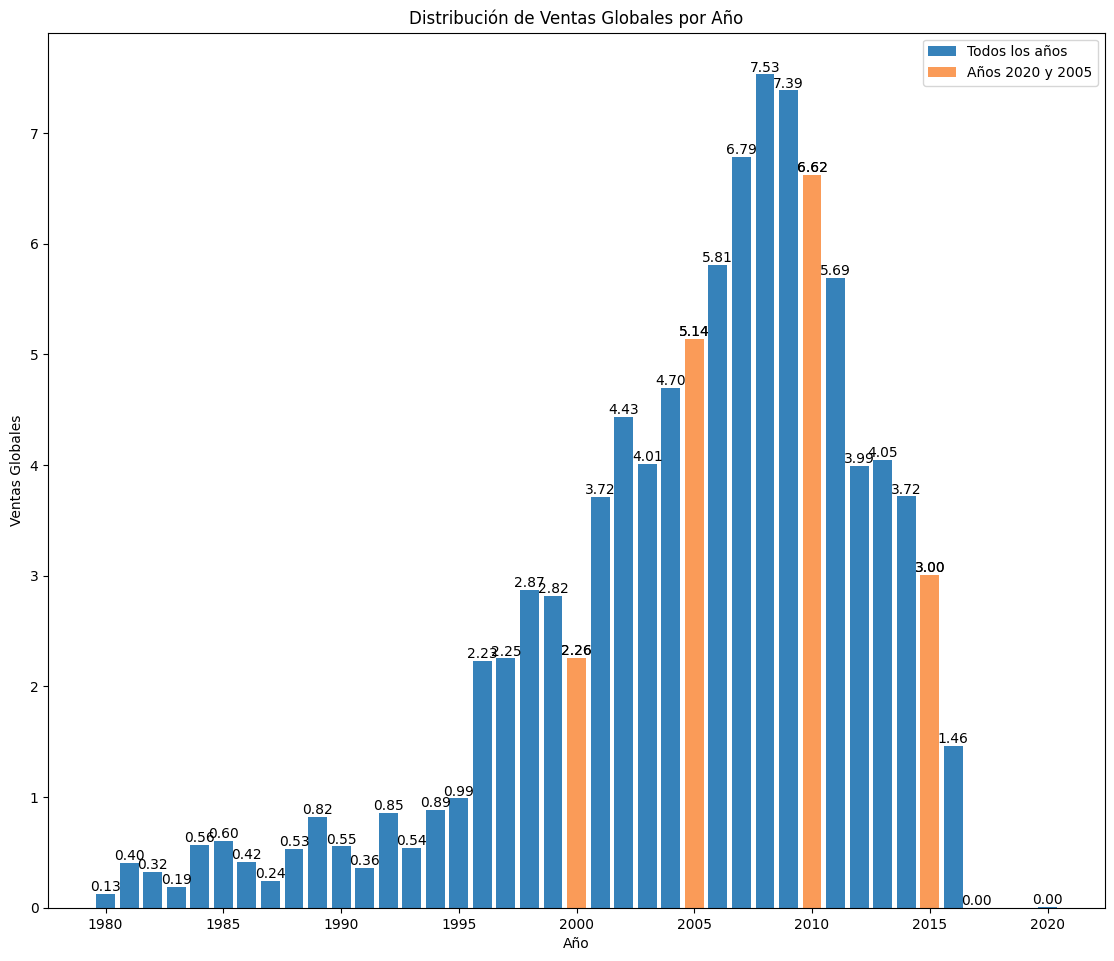

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 25))
ax = fig.add_subplot(222)

# Barras para todos los años
bars1 = plt.bar(porcentajes_por_ano['Year_of_Release'], porcentajes_por_ano['percentaje_sales'], label='Todos los años', color='#3682BA')

# Barras para los años seleccionados (2020 y 2005)
bars2 = plt.bar(porcentajes_anos_seleccionados['Year_of_Release'], porcentajes_anos_seleccionados['percentaje_sales'], color='#FA9B58', label='Años 2020 y 2005')

# Agregar valores a las barras
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
                 ha='center', va='bottom', fontsize=10, color='black')

for bar in bars2:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Año')
plt.ylabel('Ventas Globales')
plt.title('Distribución de Ventas Globales por Año')
plt.legend()
plt.show()

In [9]:
datos_generos = datos.groupby('Genre')['Global_Sales'].sum().reset_index()
datos_generos['percentaje_sales'] = (datos_generos['Global_Sales']* 100 / datos_generos['Global_Sales'].sum())
datos_generos = datos_generos.sort_values(by='percentaje_sales', ascending=True)

datos_generos

,Genre,Global_Sales,percentaje_sales
11,Strategy,174.50,1.956743
1,Adventure,237.69,2.665320
5,Puzzle,243.02,2.725087
9,Simulation,390.42,4.377946
2,Fighting,447.48,5.017784
6,Racing,728.90,8.173467
3,Misc,803.18,9.006401
4,Platform,828.08,9.285615
7,Role-Playing,934.40,10.477827
8,Shooter,1052.94,11.807066


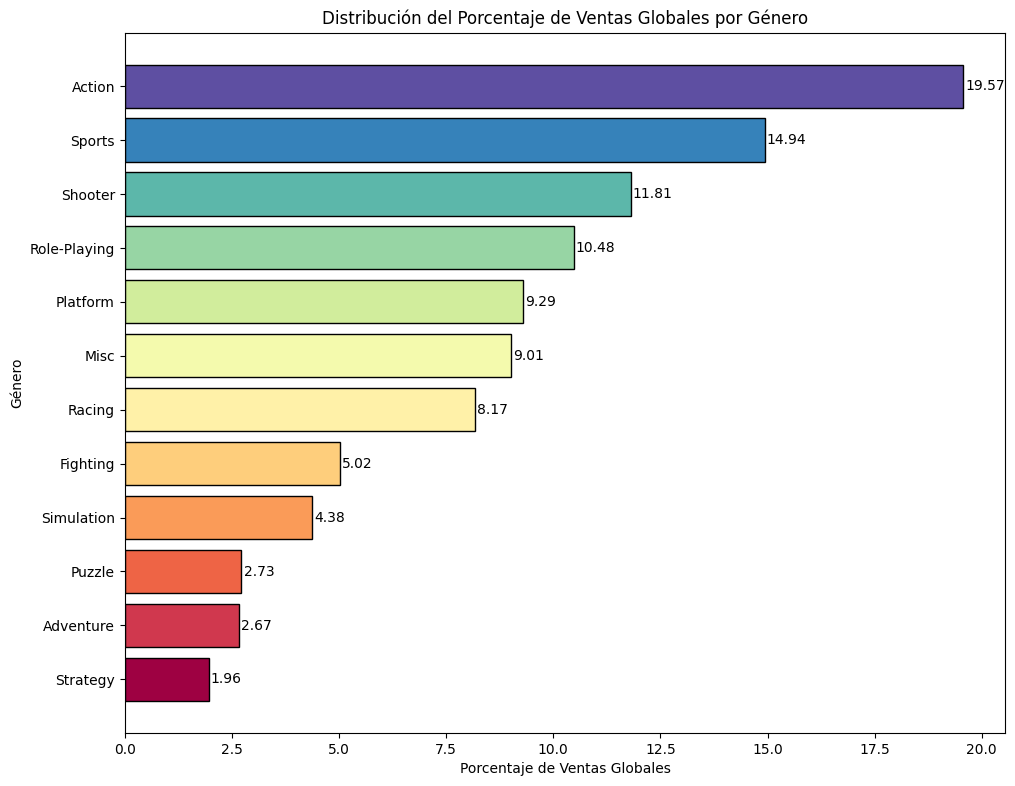

In [10]:
import matplotlib.pyplot as plt

colors = plt.cm.Spectral(np.linspace(0, 1, len(datos_generos)))

fig = plt.figure(figsize=(25, 20))
ax = fig.add_subplot(222)

# Barras con colores variados
bars1 = plt.barh(datos_generos['Genre'], datos_generos['percentaje_sales'], color=colors, label='Todos los géneros', edgecolor='black')

# Agregar valores a las barras
for bar in bars1:
    width = bar.get_width()  # Longitud de la barra en eje X
    if width > 0:
        plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'{width:.2f}', 
                 ha='left', va='center', fontsize=10, color='black')

plt.ylabel('Género')
plt.xlabel('Porcentaje de Ventas Globales')
plt.title('Distribución del Porcentaje de Ventas Globales por Género')

plt.show()

In [11]:
datos_temporales = datos[['Year_of_Release', 'Global_Sales', 'Genre']]
datos_temporales_wide =  datos_temporales.pivot_table(index='Year_of_Release', columns='Genre', values='Global_Sales', aggfunc='sum').fillna(0).reset_index()

#datos_temporales_wide.columns.name = None
datos_temporales_wide

Genre,Year_of_Release,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980.0,0.34,0.00,0.77,2.71,0.00,0.00,0.00,0.00,7.07,0.00,0.49,0.00
1,1981.0,14.84,0.00,0.00,0.00,6.93,2.24,0.48,0.00,10.04,0.45,0.79,0.00
2,1982.0,6.52,0.00,0.00,0.87,5.03,10.03,1.57,0.00,3.79,0.00,1.05,0.00
3,1983.0,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.48,0.00,3.20,0.00
4,1984.0,1.85,0.00,0.00,1.45,0.69,3.14,5.95,0.00,31.10,0.00,6.18,0.00
5,1985.0,3.52,0.00,1.05,0.00,43.17,3.21,0.00,0.00,1.00,0.03,1.96,0.00
6,1986.0,13.74,0.00,0.00,0.00,9.39,0.00,1.96,2.52,3.89,0.00,5.57,0.00
7,1987.0,1.12,4.38,5.42,0.00,1.74,0.00,0.00,4.65,0.71,0.00,3.72,0.00
8,1988.0,1.75,0.00,0.00,0.00,27.73,5.58,2.14,5.88,0.51,0.03,3.60,0.00
9,1989.0,4.64,0.00,0.00,1.28,20.66,37.75,0.00,2.20,1.20,0.00,5.72,0.00


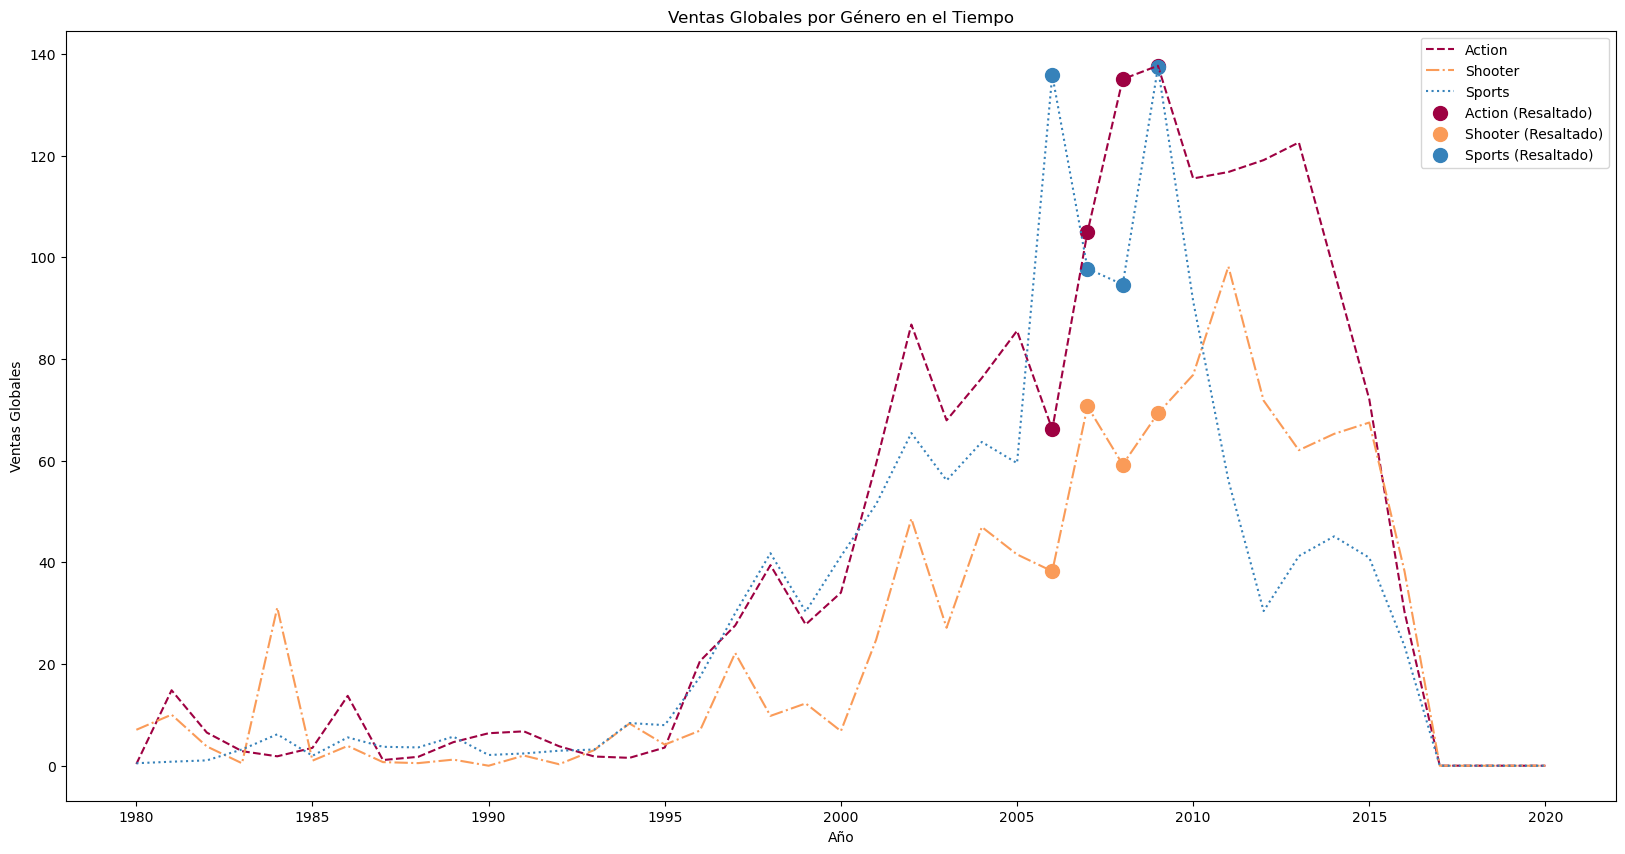

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))

# Trazar las líneas correctamente usando plt.plot()
plt.plot(datos_temporales_wide['Year_of_Release'], datos_temporales_wide['Action'], label='Action', color='#9E0142', linestyle='--')
plt.plot(datos_temporales_wide['Year_of_Release'], datos_temporales_wide['Shooter'], label='Shooter', color='#FA9B58', linestyle='-.')
plt.plot(datos_temporales_wide['Year_of_Release'], datos_temporales_wide['Sports'], label='Sports', color='#3682BA', linestyle=':')

# Años a resaltar
years_to_highlight = [2006, 2007, 2008, 2009]

# Filtrar los datos para esos años
highlight_data = datos_temporales_wide[datos_temporales_wide['Year_of_Release'].isin(years_to_highlight)]

# Agregar puntos destacados con plt.scatter()
plt.scatter(highlight_data['Year_of_Release'], highlight_data['Action'], color='#9E0142', s=100, label='Action (Resaltado)')
plt.scatter(highlight_data['Year_of_Release'], highlight_data['Shooter'], color='#FA9B58', s=100, label='Shooter (Resaltado)')
plt.scatter(highlight_data['Year_of_Release'], highlight_data['Sports'], color='#3682BA', s=100, label='Sports (Resaltado)')


plt.xlabel('Año')
plt.ylabel('Ventas Globales')
plt.title('Ventas Globales por Género en el Tiempo')
plt.legend()
plt.show()

## Ejercicio 4

* Cómo es la distribución percentil? ¿dónde presenta mayor agrupamiento de los datos?
* En una vista superpuesta indique o compare los scores para el género escogido. ¿Hay cercanía entre las valoraciones de los usuarios y la de los críticos?
* ¿Cuál es el valor del score aproximadamente donde un videojuego alcanzó el mayor número de ventas?
* ¿Cuál es la distribución de la correlación para el género escogido?
* ¿Qué relación existe entre los scores de los jugadores y de la crítica para el género escogido?

In [ ]:
import numpy as np
import pandas as pd

# Filtrar datos del género 'Action' y crear una copia para evitar advertencias
Action = datos[datos.Genre == 'Action'].copy()

# Reemplazar 'tbd' con NaN en la columna 'User_Score'
Action.loc[:, 'User_Score'] = Action['User_Score'].replace('tbd', np.nan)

# Convertir a tipo numérico
Action.loc[:, 'User_Score'] = pd.to_numeric(Action['User_Score'])

# Escalar la puntuación de usuarios a base 10
Action.loc[:, 'User_Score'] = Action['User_Score'] * 10

# Mostrar las primeras filas de la tabla
display(Action.head()) 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,User_score_10,percentaje_sales
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,82.0,3994.0,Rockstar North,M,82,0.235867
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,90.0,1588.0,Rockstar North,M,90,0.233288
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,81.0,3711.0,Rockstar North,M,81,0.182393
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95.0,62.0,87.0,730.0,Rockstar North,M,87,0.181048
38,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,97.0,56.0,85.0,664.0,DMA Design,M,85,0.146856


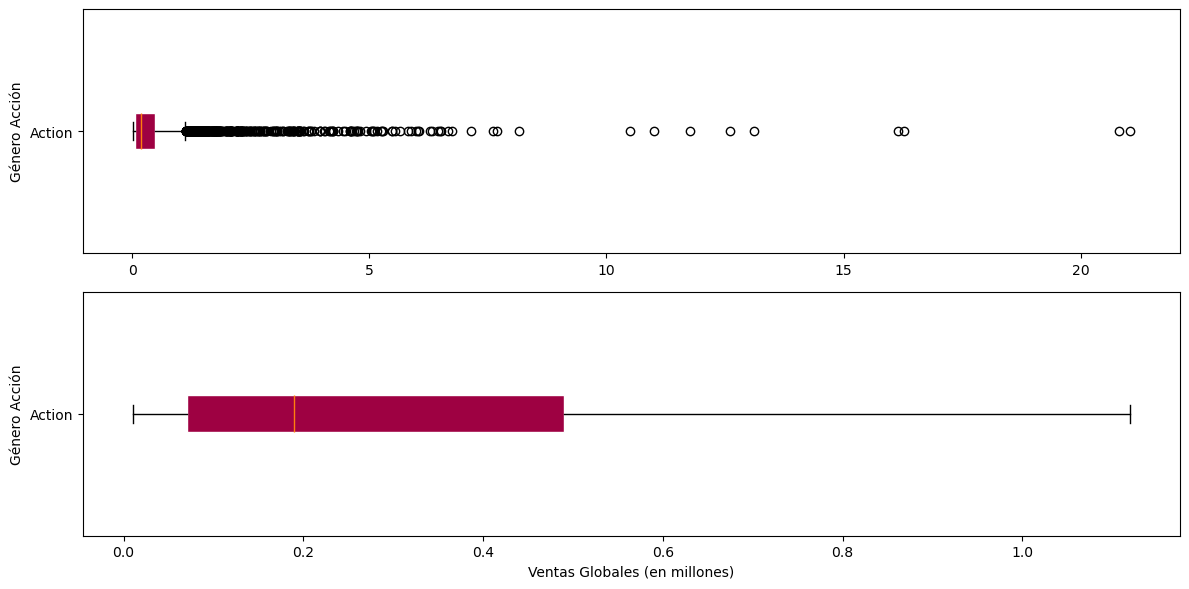

In [ ]:
fig = plt.figure(figsize=(12, 6))


fig1 = fig.add_subplot(2,1,1)
fig1.boxplot([Action['Global_Sales']], labels=['Action'], 
            patch_artist=True, 
            boxprops=dict(facecolor='#9E0142', color='white'), 
            vert=False, 
            showfliers=True)

fig1.set_ylabel('Género Acción')



fig2 = fig.add_subplot(2,1,2)
fig2.boxplot([Action['Global_Sales']], labels=['Action'], 
            patch_artist=True, 
            boxprops=dict(facecolor='#9E0142', color='white'), 
            vert=False, 
            showfliers=False)

fig2.set_ylabel('Género Acción')
fig2.set_xlabel('Ventas Globales (en millones)')


plt.tight_layout()  # Ajustar el espacio entre los gráficos
plt.show()

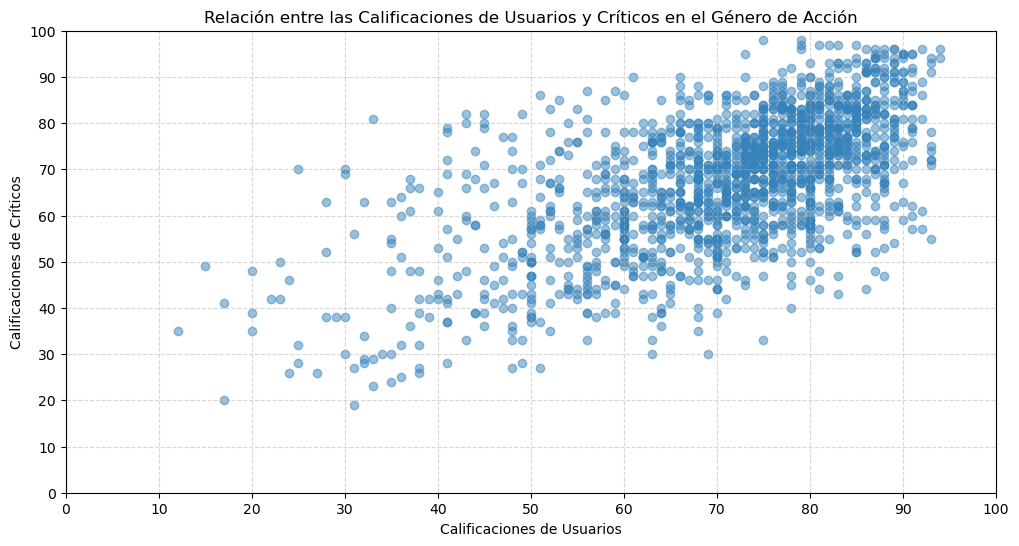

In [ ]:
fig = plt.figure(figsize=(12, 6))

plt.scatter(Action['User_Score'], Action['Critic_Score'], color='#3682BA', alpha=0.5)

plt.xlabel('Calificaciones de Usuarios')
plt.ylabel('Calificaciones de Críticos')
plt.title("Relación entre las Calificaciones de Usuarios y Críticos en el Género de Acción")

# Definir los intervalos de 10 en 10
plt.xticks(np.arange(0, 110, 10))  # Escala de 0 a 100 con pasos de 10
plt.yticks(np.arange(0, 110, 10))  # Escala de 0 a 100 con pasos de 10

# Ajustar los límites de los ejes para asegurarnos de que cubran todo el rango
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.grid(True, linestyle="--", alpha=0.5)  # Agregar una cuadrícula opcional

plt.show()


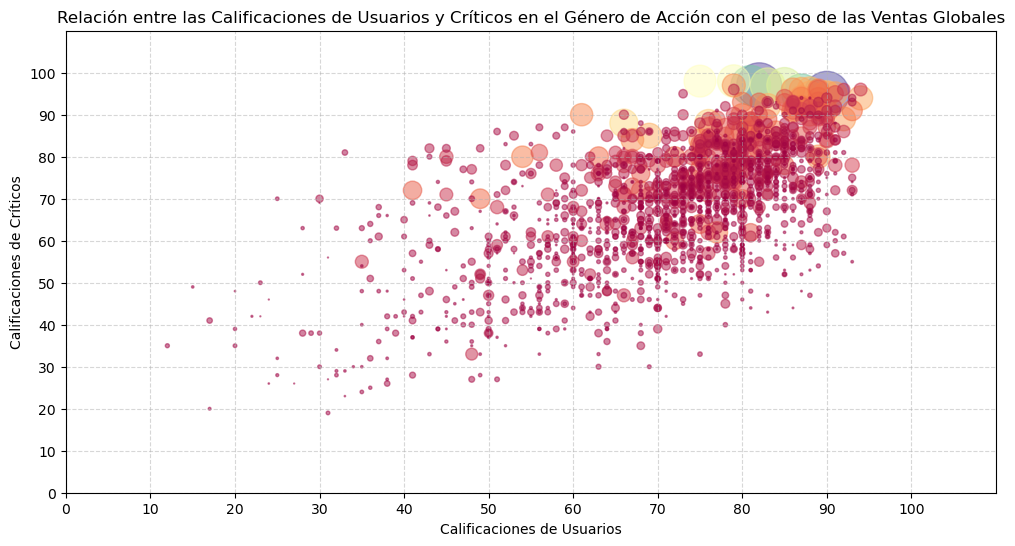

In [ ]:
fig = plt.figure(figsize=(12, 6))

plt.scatter(Action['User_Score'], Action['Critic_Score'], s=Action['Global_Sales']*50, c=Action['Global_Sales'],  cmap = 'Spectral', alpha=0.5)

plt.xlabel('Calificaciones de Usuarios')
plt.ylabel('Calificaciones de Críticos')
plt.title("Relación entre las Calificaciones de Usuarios y Críticos en el Género de Acción con el peso de las Ventas Globales")

# Definir los intervalos de 10 en 10
plt.xticks(np.arange(0, 110, 10))  # Escala de 0 a 100 con pasos de 10
plt.yticks(np.arange(0, 110, 10))  # Escala de 0 a 100 con pasos de 10

# Ajustar los límites de los ejes para asegurarnos de que cubran todo el rango
plt.xlim(0, 110)
plt.ylim(0, 110)

plt.grid(True, linestyle="--", alpha=0.5)  # Agregar una cuadrícula opcional

plt.show()

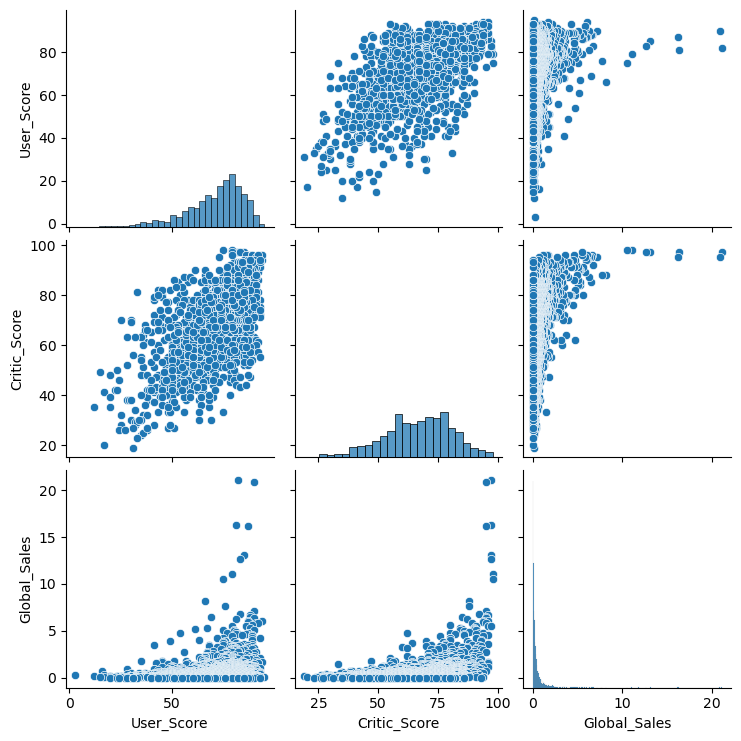

In [ ]:
import warnings
warnings.filterwarnings('ignore')

action_selectes = Action[['User_Score', 'Critic_Score', 'Global_Sales']]

# Basic correlogram
sns.pairplot(action_selectes)
plt.show()

El rango de ventas globales con menor dispersión y concentración de los datos estuvo entre los valores de 0.01 millones de dólares y 0.08 millones de dólares que concentran el primer cuartil (Q1). El rango con mayor dispersión de los datos de valores de ventas globales se observó para el Q3-Q4, desde los 0.5 a los 1.2 millones de dólares.

La relación que se encontró entre los scores de los usuarios y los scores de la crítica fue directamente proporcional, y por lo general cuando la crítica le da buena calificación a los juego de acción, los usuarios tambien los califican de la misma manera.

Cuando se analiza como se relacionan los scores tanto de la crítica cómo de los usuarios con las ventas globales se puede observar que esta relación es más bien de tipo logarítmica, dónde los scores medios mantienen ventas más bien bajas y son los valores de scores más altos los que disparan las ventas de manera general.

## Ejercicio Bonus

* ¿Qué plataforma obtuvo la mayor cantidad de ventas?
* ¿Cuántos juegos por año se lanzaron por plataforma?
* ¿Cuál es el juego más valorado por la crítica? ¿Cuál por los usuarios?
* ¿Cuántos juegos tiene cada productor o publicador de videojuegos?

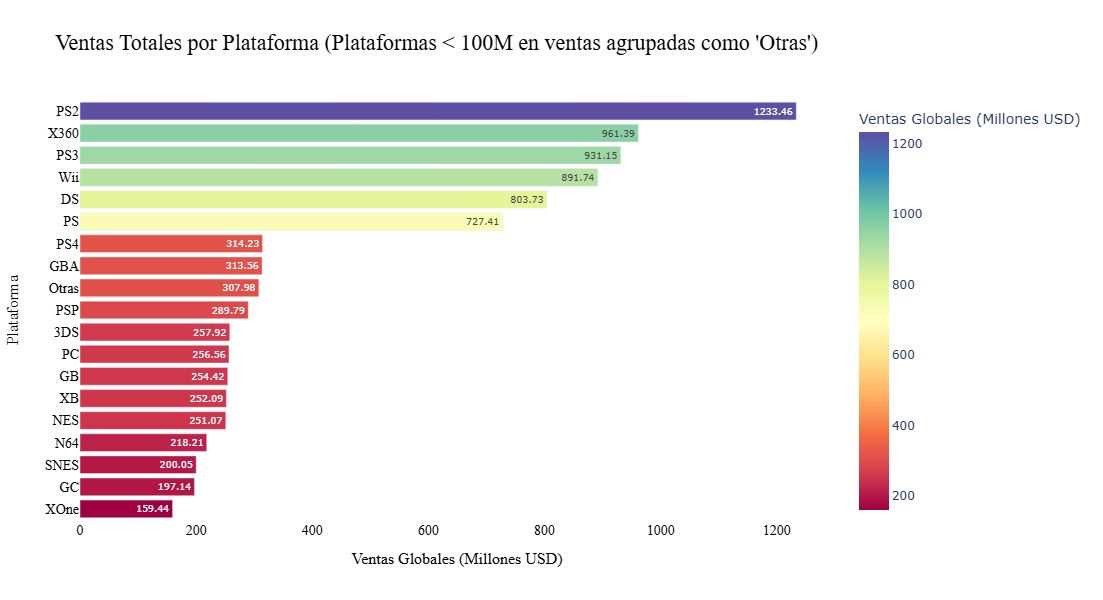

In [ ]:
import plotly.express as px
import pandas as pd

# Eliminación de NAN
df_clean = df.dropna(subset=["Platform", "Global_Sales"])
df_clean["Global_Sales"] = pd.to_numeric(df_clean["Global_Sales"], errors="coerce")

# Agrupar ventas por plataforma
ventas_por_plataforma = df_clean.groupby("Platform")["Global_Sales"].sum().reset_index()

# Categoria "Otras" para las plataformas con ventas inferiores a 100M
ventas_por_plataforma["Platform"] = ventas_por_plataforma.apply(
    lambda row: "Otras" if row["Global_Sales"] < 100 else row["Platform"], axis=1
)

# Reagrupamiento de las ventas
ventas_por_plataforma = ventas_por_plataforma.groupby("Platform")["Global_Sales"].sum().reset_index()

# Ordenar de Mayor a menor
ventas_por_plataforma = ventas_por_plataforma.sort_values(by="Global_Sales", ascending=True)

# Gráfico de barras
fig = px.bar(
    ventas_por_plataforma,
    x="Global_Sales",
    y="Platform",
    orientation="h",
    text_auto=".2f",
    title="Ventas Totales por Plataforma (Plataformas < 100M en ventas agrupadas como 'Otras')",
    labels={"Global_Sales": "Ventas Globales (Millones USD)", "Platform": "Plataforma"},
    color="Global_Sales",
    color_continuous_scale="Spectral"
)

# Personalizar texto
fig.update_layout(
    plot_bgcolor="white",  # Fondo blanco
    width=1000,
    height=600,
    
    xaxis=dict(
        showgrid=False,
        tickfont=dict(size=14, family="serif", color="black"),  # Tamaño y fuente de los números en eje X
        titlefont=dict(size=16, family="Bold Serif", color="black")  # Etiqueta del eje X
    ),
    yaxis=dict(
        showgrid=False,
        tickfont=dict(size=14, family="serif", color="black"),  # Tamaño y fuente de los nombres de plataformas en eje Y
        titlefont=dict(size=16, family="Bold Serif", color="black")  # Etiqueta del eje Y
    ),
    title=dict(
        font=dict(size=22, family="Bold Serif", color="black")  # Tamaño y tipo de letra del título
    )
)

fig.show()



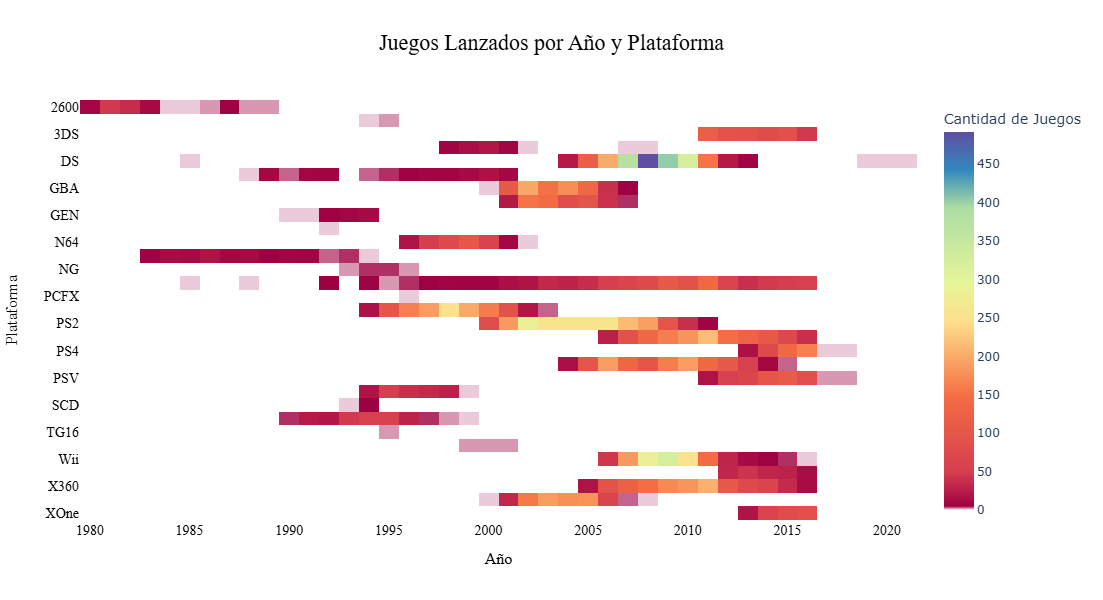

In [ ]:
import plotly.express as px
import pandas as pd

# Eliminación de NAN
df_clean = df.dropna(subset=["Year_of_Release", "Platform"])
df_clean["Year_of_Release"] = df_clean["Year_of_Release"].astype(int)

# Agrupacion de cantidad de juegos por año y plataforma
juegos_por_año = df_clean.groupby(["Year_of_Release", "Platform"]).size().reset_index(name="Total_Juegos")

# Convertir a matriz
heatmap_data = juegos_por_año.pivot(index="Platform", columns="Year_of_Release", values="Total_Juegos").fillna(0)

# Crear Heatmap
fig = px.imshow(
    heatmap_data,
    labels=dict(x="Año", y="Plataforma", color="Cantidad de Juegos",family="Bold Serif"),
    title="Juegos Lanzados por Año y Plataforma",
    color_continuous_scale=[
        [0, 'white'],  # Blanco cuando el valor es cero
        [0.01, '#9E0142'], # rojo oscuro para valores bajos
        [0.1, '#D53E4F'],  # rojo claro para valores bajos
        [0.3, '#F46D43'],  # Valores intermedios en naranja
        [0.5, '#FEE08B'],  # Valores intermedios en amarillo
        [0.6, '#E6F598'],  # Valores intermedios en verde amarillo
        [0.8, '#ABDDA4'],  # verde Valores intermedios en naranja
        [0.9, '#3288BD'],  # Valores más altos en azul
        [1, '#5E4FA2']  # Valores más altos en azul
    ]
)

# Personalizar texto
fig.update_layout(
    plot_bgcolor="white",
    width=1000,
    height=600,
    xaxis=dict(
        showgrid=True, gridcolor="gray",
        tickfont=dict(size=14, family="Bold Serif", color="black"),
        titlefont=dict(size=16, family="Bold Serif", color="black")
    ),
    yaxis=dict(
        showgrid=True, gridcolor="gray",
        tickfont=dict(size=14, family="Bold Serif", color="black"),
        titlefont=dict(size=16, family="Bold Serif", color="black")
    ),
    title=dict(
        font=dict(size=22, family="Bold Serif", color="black") ,
        x=0.5
    )
)

fig.show()





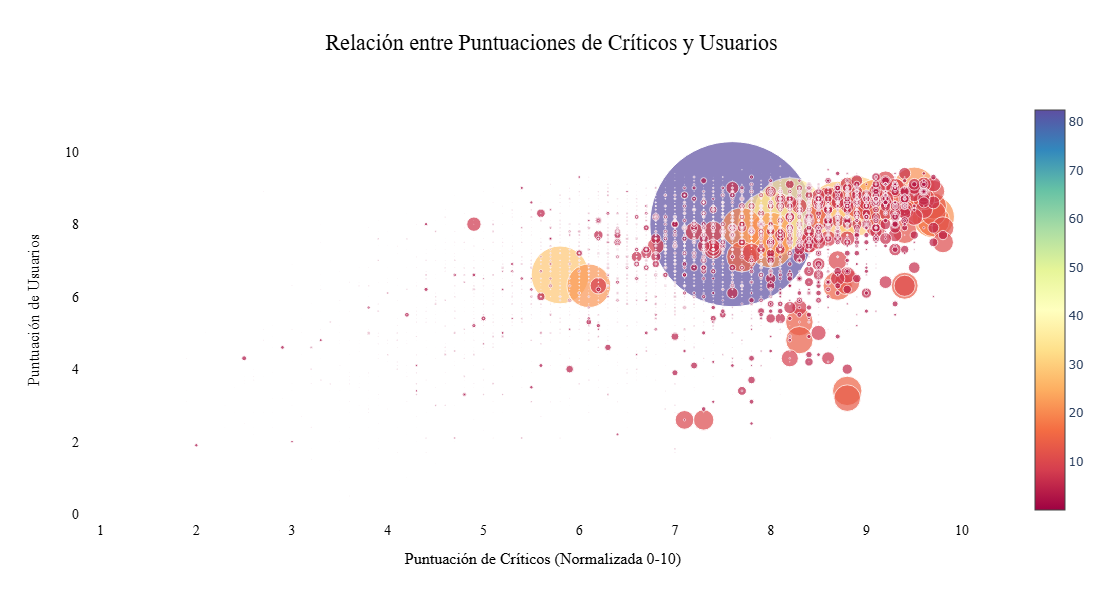

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Quitar valores NaN y asegurar formato correcto
df_clean = df.dropna(subset=["Critic_Score", "User_Score", "Global_Sales"]).copy()

# Conversion a formato numerico
df_clean.loc[:, "Critic_Score"] = pd.to_numeric(df_clean["Critic_Score"], errors="coerce")
df_clean.loc[:, "User_Score"] = pd.to_numeric(df_clean["User_Score"], errors="coerce")

# Normalización de los puntajes
df_clean.loc[:, "Critic_Score_Norm"] = df_clean["Critic_Score"] / 10  # Escalar a 0-10

# Crear el Scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_clean["Critic_Score_Norm"],
    y=df_clean["User_Score"],
    mode='markers',
    marker=dict(
        size=df_clean["Global_Sales"] * 2,  # Tamaño según ventas globales
        color=df_clean["Global_Sales"],  # Color según ventas
        colorscale="Spectral",
        showscale=True
    ),
    text=df_clean["Name"],
    name="Valoraciones Críticos vs Usuarios",
    hovertemplate="<b>%{text}</b><br>Críticos: %{x:.1f}<br>Usuarios: %{y:.1f}<br>Ventas: %{marker.color:.2f}M<extra></extra>"
))

# Personalización de texto
fig.update_layout(
    width=1000,
    height=600,
    title=dict(
        text="Relación entre Puntuaciones de Críticos y Usuarios",
        x=0.5,  # Centrar título
        font=dict(size=22, family="Bold Serif", color="black")
    ),
    xaxis=dict(
        title="Puntuación de Críticos (Normalizada 0-10)",
        showgrid=False,  # Quitar grilla
        tickfont=dict(size=14, family="Bold Serif", color="black"),
        titlefont=dict(size=16, family="Bold Serif", color="black")
    ),
    yaxis=dict(
        title="Puntuación de Usuarios",
        showgrid=False,  # Quitar grilla
        tickfont=dict(size=14, family="Bold Serif", color="black"),
        titlefont=dict(size=16, family="Bold Serif", color="black")
    ),
    plot_bgcolor="white"
)

fig.show()


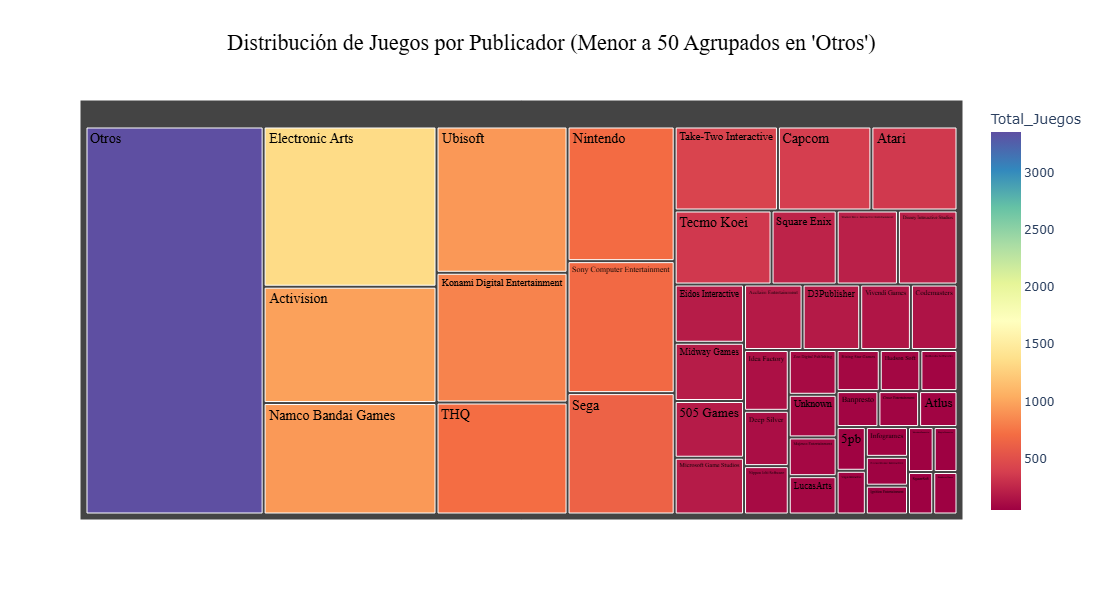

In [ ]:
import plotly.express as px
import pandas as pd

# limpieza de datos: quitar valores nan y asegurar formato correcto
df_clean = df.dropna(subset=["Publisher"]).copy()

# contar el número de juegos por publicador
publisher_counts = df_clean["Publisher"].value_counts().reset_index()
publisher_counts.columns = ["Publisher", "Total_Juegos"]

# agrupar los publicadores con menos de 50 juegos en "otros"
publisher_counts.loc[publisher_counts["Total_Juegos"] < 50, "Publisher"] = "Otros"

# volver a contar después de agrupar
publisher_counts = publisher_counts.groupby("Publisher")["Total_Juegos"].sum().reset_index()

# crear treemap interactivo
fig = px.treemap(
    publisher_counts,
    path=["Publisher"],  # estructura jerárquica del treemap
    values="Total_Juegos",
    title="Distribución de Juegos por Publicador (Menor a 50 Agrupados en 'Otros')",
    color="Total_Juegos",
    color_continuous_scale="Spectral",
)

# personalización del diseño
fig.update_layout(
    width=1000,
    height=600,
    title=dict(
        text="Distribución de Juegos por Publicador (Menor a 50 Agrupados en 'Otros')",
        x=0.5,  # centrar título
        font=dict(size=22, family="Bold Serif", color="black"),
    ),
    plot_bgcolor="white",
)

# modificar etiquetas al pasar el cursor
fig.update_traces(
    hovertemplate="<b>%{label}</b><br>Total de Juegos: %{value}<extra></extra>",
    textfont=dict(size=14, family="Bold Serif", color="black")  # modificar fuente de etiquetas
)

fig.show()


El análisis de ventas por plataforma en el grafico de barras, muestra que PS2 es la consola más vendida de la historia, superando los 1,200 millones de USD. Otras plataformas destacadas incluyen X360, PS3, Wii y DS, lo que evidencia el dominio de Sony y Microsoft en la industria. Las plataformas con ventas inferiores a 100 millones se agruparon en "Otras", reflejando un mercado donde pocas consolas concentran la mayoría de las ventas.

El heatmap de lanzamientos muestra con tonos azules los valores más altos, evidenciando un auge en la industria entre 2005 y 2010, con un alto número de juegos lanzados para PS2, Wii y X360. A partir de 2015, la cantidad de títulos disminuye (tonos rojos), lo que podría estar relacionado con la transición hacia modelos digitales y servicios de suscripción y la pandemia.

En cuanto al diagrama de dispersión, se muestra la relación entre las puntuaciones de críticos y usuarios, se observa una correlación positiva: los juegos mejor valorados por la crítica suelen recibir buenas calificaciones de los jugadores. Sin embargo, hay excepciones donde títulos con altas puntuaciones de críticos son mal recibidos por los usuarios, posiblemente por diferencias en expectativas o controversias. Además, los juegos con mayores ventas no siempre son los mejor puntuados, lo que indica que el éxito comercial no depende exclusivamente de la valoración del público.

El análisis de publicadores a traves del treemap, muestra que la industria está dominada por Electronic Arts, Ubisoft y Activision, con un alto volumen de juegos lanzados. Nintendo, Sega y Capcom también destacan con catálogos extensos, mientras que un gran número de estudios más pequeños se agrupan en la categoría "Otros". Esto confirma que, aunque existen muchas empresas en el sector, la producción de videojuegos está concentrada en unas pocas grandes compañías.